In [1]:
import cv2
import os
import warnings
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

from skimage import io
from skimage.color import rgb2gray
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

warnings.filterwarnings('ignore')

In [2]:
# establish a folder named LAB3
path = "LAB3"
if not os.path.isdir(path):
    os.mkdir(path)

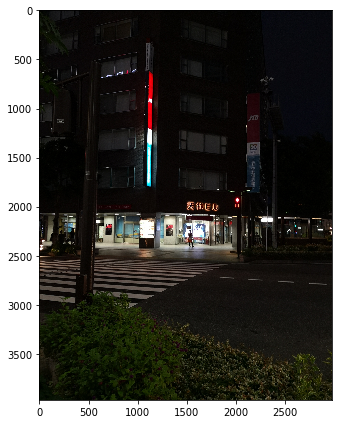

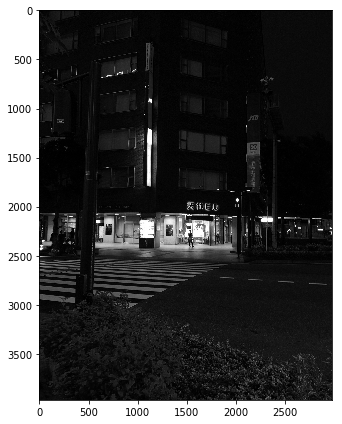

In [3]:
# show the RGB picture
imgRGB = io.imread('street.jpg')
plt.figure(figsize=(15,6)) 
io.imshow(imgRGB)
io.imsave('LAB3/streetRGB.jpg', imgRGB)

# show the gray picture
imgGray = cv2.cvtColor(imgRGB,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,6)) 
io.imshow(imgGray, cmap = 'gray')
io.imsave('LAB3/streetGray.jpg', imgGray)

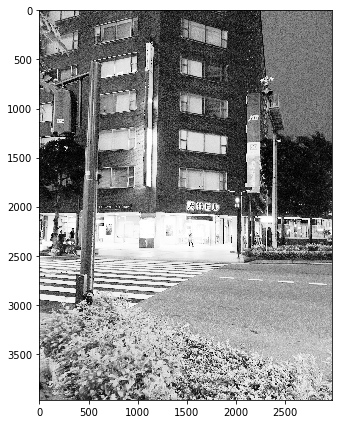

In [4]:
# Global equalize
img_gleq = exposure.equalize_hist(imgGray)

# Plot
plt.figure(figsize=(15,6)) 
io.imshow(img_gleq, cmap = 'gray')
io.imsave('LAB3/streetGL_EQ.jpg', img_gleq)

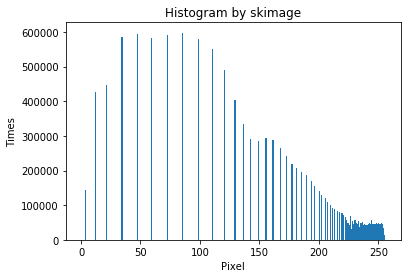

In [5]:
img_gleqNew = img_gleq*255

plt.xlabel('Pixel')
plt.ylabel('Times')
plt.title('Histogram by skimage')
plt.hist(img_gleqNew.ravel(), 256, [0, 256])
plt.savefig('LAB3/Histogram by skimage')
plt.show()

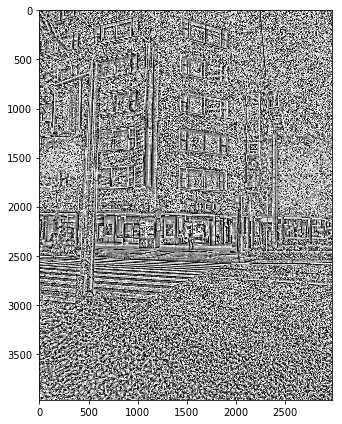

In [12]:
# Local equalization
selem = disk(30)
img_loeq = rank.equalize(imgGray, selem=selem)

# Plot
plt.figure(figsize=(15,6)) 
io.imshow(img_loeq, cmap = 'gray')
io.imsave('LAB3/streetLO_EQ.jpg', img_loeq)

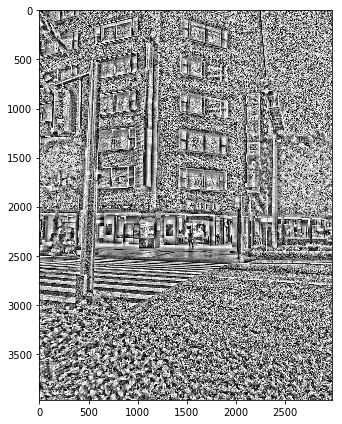

In [13]:
# Local equalization, change parameter
selem = disk(60)
img_loeq = rank.equalize(imgGray, selem=selem)

# Plot
plt.figure(figsize=(15,6)) 
io.imshow(img_loeq, cmap = 'gray')
io.imsave('LAB3/streetLO_EQ.jpg', img_loeq)

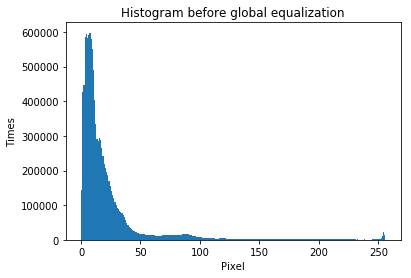

7    597860
4    594158
6    590723
3    584891
5    581575
dtype: int64

origin sum : 11808768
pixelDistribution sum : 11808768


In [8]:
pixelCount = []
imgGrayOpenCV = cv2.cvtColor(imgRGB,cv2.COLOR_BGR2GRAY)
imgGrayVector = imgGrayOpenCV.flatten()

# Plot
plt.xlabel('Pixel')
plt.ylabel('Times')
plt.title('Histogram before global equalization')
plt.hist(imgGrayOpenCV.ravel(), 256, [0, 256])
plt.show()

# Get the distribution of this img pixel
pixelDistribution = pd.value_counts(imgGrayVector)
print(pixelDistribution.head())

# Check the number of img pixel
print("\norigin sum :",len(imgGrayVector))
print("pixelDistribution sum :",sum(pixelDistribution))

In [9]:
# Follow 0~255 sequence, append the pixel value to pixelCount
pixelCount = []
for i in range(0,256):
    pixelCount.append(pixelDistribution[i])
print(pixelCount)

# Check the number of img pixel
print("\norigin sum :",len(imgGrayVector))
print("pixelDistribution sum :",sum(pixelDistribution))
print("pixelCount sum :",sum(pixelCount))

[143920, 427249, 445802, 584891, 594158, 581575, 590723, 597860, 579016, 552027, 490338, 403522, 334988, 291204, 285259, 293521, 286732, 265167, 241199, 219837, 206071, 195112, 185898, 170556, 154254, 141983, 129707, 119329, 109395, 100211, 93236, 88513, 84426, 80968, 77044, 72551, 66122, 57792, 49118, 41719, 36476, 33657, 30958, 27923, 25584, 23174, 21381, 19732, 18620, 17655, 16765, 16191, 15724, 15312, 14627, 14266, 13997, 13856, 13459, 12952, 12821, 12545, 12102, 12267, 12227, 12168, 12338, 12326, 12744, 13107, 13615, 14239, 14629, 14620, 15095, 15068, 14803, 14576, 14207, 14189, 14217, 14415, 14458, 15018, 15100, 15532, 15977, 16198, 16240, 15885, 15349, 14175, 13241, 12120, 11158, 10448, 9854, 9193, 8620, 7841, 7379, 6810, 6514, 6036, 5526, 5187, 4931, 4561, 4385, 4086, 3895, 3809, 3778, 3690, 3728, 3641, 3824, 3880, 3909, 3879, 3890, 3767, 3720, 3615, 3475, 3397, 3421, 3370, 3432, 3361, 3304, 3229, 3156, 3062, 2946, 2797, 2961, 2950, 3015, 2897, 2900, 3034, 3076, 3086, 2962, 294

[3.0, 12.0, 22.0, 35.0, 47.0]

origin sum : 11808768
pixelDistribution sum : 11808768
pixelCount sum : 11808768
ansGlobal sum : 11808768


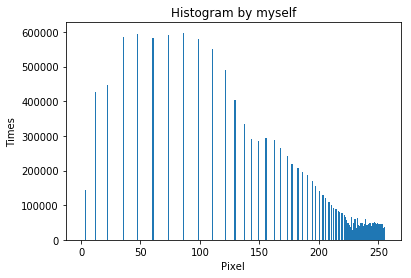

In [10]:
# Global equalization : get the change value
denominator = sum(pixelCount)/255
tempSum = 0

pixelValueChange = []
for i in range(0,256):
    tempSum = tempSum + pixelCount[i]
    pixelValueChange.append(round(tempSum/denominator))
    
print(pixelValueChange[:5])

# Global equalization : change pixel value
ansGlobal = []
seq = 0

for i in range(0,256):
    if i == 0:
        temp = 0
    else:
        temp = temp + pixelCount[i-1]
    ansGlobal[temp:pixelCount[i]] = [pixelValueChange[i] for k in range(0,pixelCount[i])]
    
# Check the number of img pixel
print("\norigin sum :",len(imgGrayVector))
print("pixelDistribution sum :",sum(pixelDistribution))
print("pixelCount sum :",sum(pixelCount))
print("ansGlobal sum :",len(ansGlobal))

# Plot
plt.xlabel('Pixel')
plt.ylabel('Times')
plt.title('Histogram by myself')
plt.hist(ansGlobal, 256, [0, 256]) 
plt.savefig('LAB3/Histogram by myself')
plt.show()